In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import MultinomialNB

In [10]:
data = pd.read_excel('customer_churn_large_dataset.xlsx')

In [11]:
df = data.copy()

#Data Exploration

In [12]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB
None


In [14]:
print(df.describe())

          CustomerID            Age  Subscription_Length_Months   
count  100000.000000  100000.000000               100000.000000  \
mean    50000.500000      44.027020                   12.490100   
std     28867.657797      15.280283                    6.926461   
min         1.000000      18.000000                    1.000000   
25%     25000.750000      31.000000                    6.000000   
50%     50000.500000      44.000000                   12.000000   
75%     75000.250000      57.000000                   19.000000   
max    100000.000000      70.000000                   24.000000   

        Monthly_Bill  Total_Usage_GB          Churn  
count  100000.000000   100000.000000  100000.000000  
mean       65.053197      274.393650       0.497790  
std        20.230696      130.463063       0.499998  
min        30.000000       50.000000       0.000000  
25%        47.540000      161.000000       0.000000  
50%        65.010000      274.000000       0.000000  
75%        82.6400

In [15]:
# Check for missing values
print(df.isnull().sum())

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64


In [26]:
# Explore the distribution of the target variable
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\91932\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\91932\AppData\Local\Temp\ipykernel_20300\1969244963.py", line 2, in <module>
    sns.countplot(x='Churn', data=df)
  File "c:\Users\91932\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py", line 2953, in countplot
    ax = plt.gca()
  File "c:\Users\91932\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\pyplot.py", line 2227, in gca
    .. note::
  File "c:\Users\91932\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\pyplot.py", line 832, in gcf
    f"More than {max_open_warning} figures have been opened. "
  File "c:\Users\91932\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\_api\deprecation.py", line 454, in wrapper
    return func(*args, **kwargs)
  F

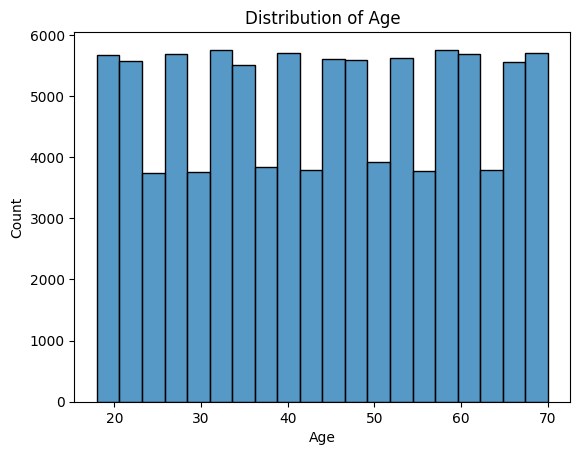

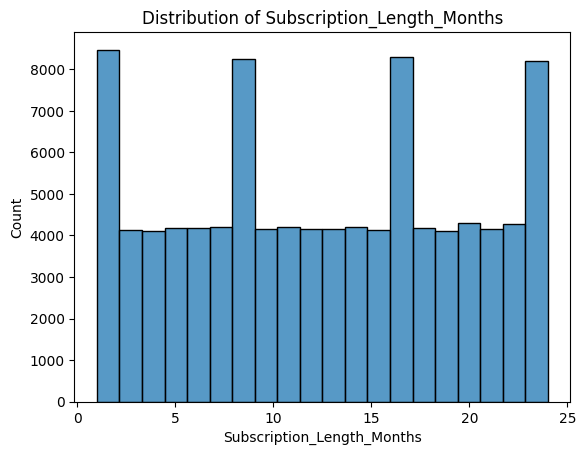

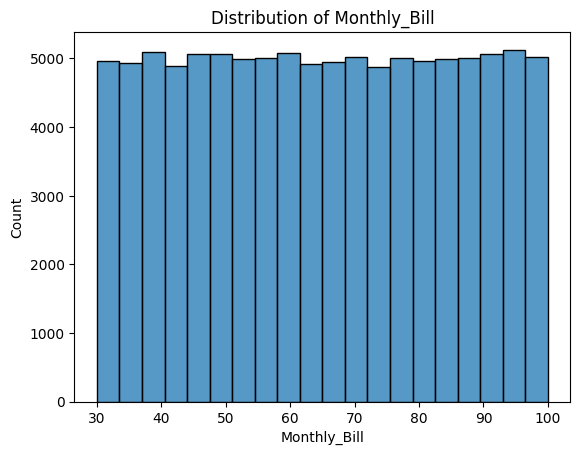

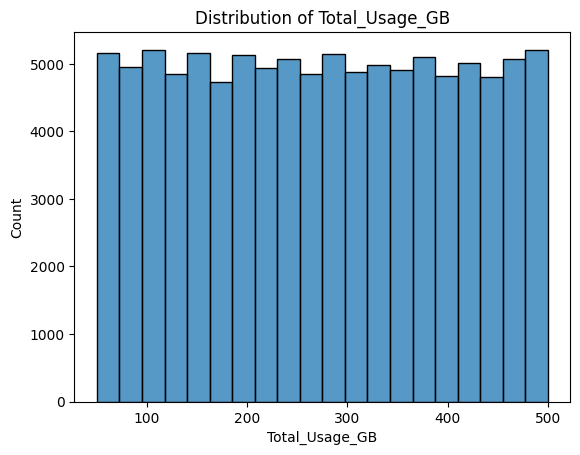

In [ ]:
# Explore numerical variables
num_cols = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']
for col in num_cols:
    sns.histplot(df[col], bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()

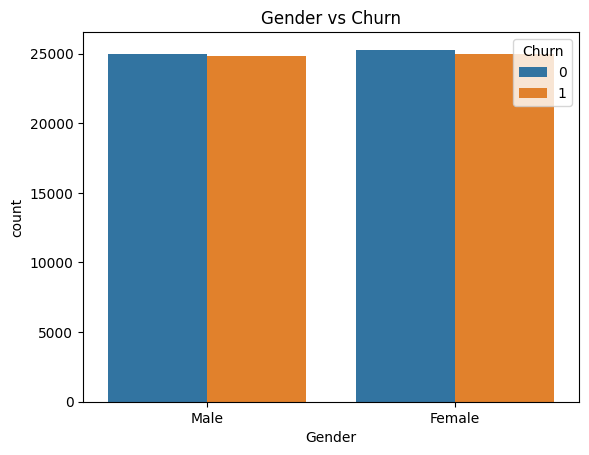

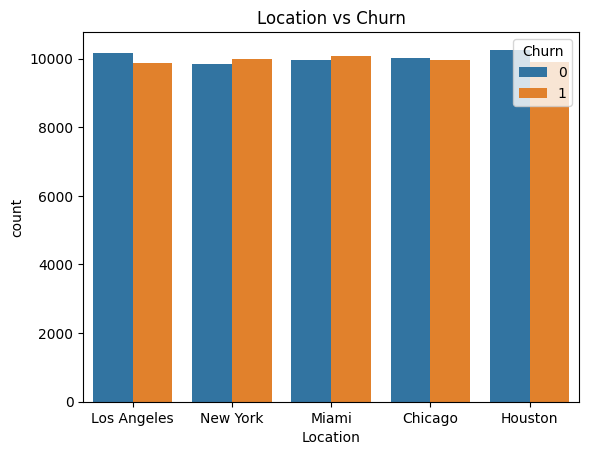

In [ ]:
# Explore categorical variables
cat_cols = ['Gender', 'Location']
for col in cat_cols:
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'{col} vs Churn')
    plt.show()

In [ ]:
# Explore relationships between numerical variables
# sns.pairplot(df, hue='Churn', diag_kind='kde')
# plt.show()


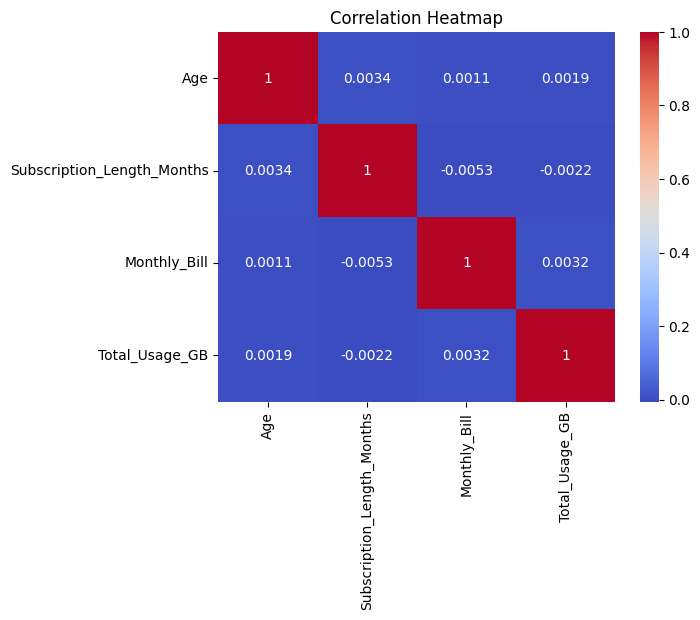

In [ ]:
# Explore correlations between numerical variables
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Explore statistics by churn status
churn_stats = df.groupby('Churn').mean()
(churn_stats[['Age','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB']])

<ipython-input-14-44dc754effb9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  churn_stats = df.groupby('Churn').mean()


,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
Churn,,,,
0,44.003305,12.474045,65.057453,274.762729
1,44.050945,12.506298,65.048903,274.021294


In [ ]:
# Correlation with the target variable (Churn)
correlation_with_churn = df.corr()['Churn'].sort_values(ascending=False)
(correlation_with_churn)

<ipython-input-15-78889a0903eb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_churn = df.corr()['Churn'].sort_values(ascending=False)


Churn                         1.000000
Subscription_Length_Months    0.002328
Age                           0.001559
Monthly_Bill                 -0.000211
Total_Usage_GB               -0.002842
CustomerID                   -0.004586
Name: Churn, dtype: float64

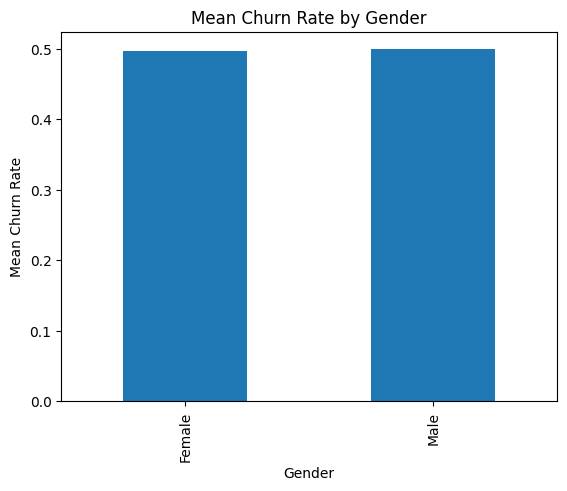

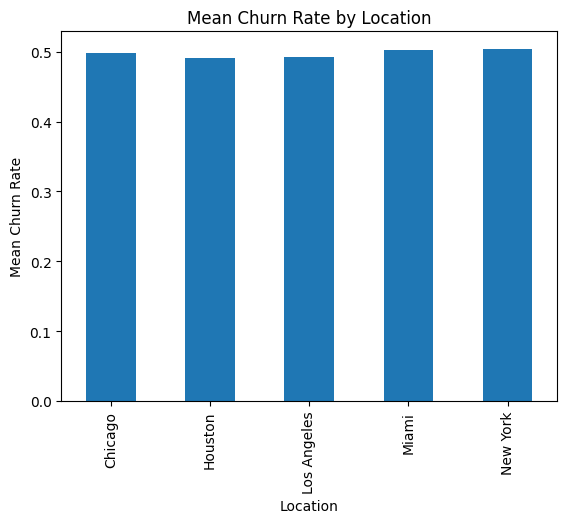

In [ ]:
# Compare mean values of numerical variables for different categories
cat_cols = ['Gender', 'Location']

for col in cat_cols:
    group_mean = df.groupby(col)['Churn'].mean()
    group_mean.plot(kind='bar')
    plt.title(f'Mean Churn Rate by {col}')
    plt.ylabel('Mean Churn Rate')
    plt.show()

#Data Preprocessing

In [ ]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [ ]:
# Drop any irrelevant columns
df = df.drop(columns=['CustomerID','Name'])

#Feature Engineering

In [ ]:
# Calculate new features
df['Subscription_Length_to_Age_Ratio'] = df['Subscription_Length_Months'] / df['Age']
df['Monthly_Bill_to_Usage_Ratio'] = df['Monthly_Bill'] / df['Total_Usage_GB']
df['Tenure'] = df['Subscription_Length_Months']

In [ ]:
# Interaction features
df['Age_Subscription_Length'] = df['Age'] * df['Subscription_Length_Months']
df['MonthlyBill_TotalUsage'] = df['Monthly_Bill'] * df['Total_Usage_GB']


In [ ]:
# Aggregated statistics
mean_bill_by_location = df.groupby('Location')['Monthly_Bill'].mean()
df['Mean_Bill_by_Location'] = df['Location'].map(mean_bill_by_location)


#Data encoding

In [17]:
df = data.copy()

In [18]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [21]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [22]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
# Drop irrelevant columns

df = df.drop(columns=['CustomerID', 'Name'])

# Split features and target variable
X = df.drop(columns=['Churn'])
y = df['Churn']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical and categorical columns
numerical_cols = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']
categorical_cols = ['Gender', 'Location']

# Preprocessing for numerical data: fill missing values with mean, standardize
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data: fill missing values with mode, one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Define the model
model = RandomForestClassifier(random_state=42)

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.49565


In [23]:
import joblib

# Save the pipeline
joblib.dump(pipeline, 'pipeline1.joblib')


['pipeline1.joblib']